<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/filtro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import sys
import h5py #librerua para crear archivos , h5py

In [2]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks")
import unzipmodule
import graficador

In [6]:
#celda para crear la lista con los paths de mi data
paths=[] #creo la lista de pahts
names=[] #creo la lista de nombres
output_file=[]
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3')
names.append('vibration')
names.append('part1')
names.append('part2')
names.append('part3')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1/vibration')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1/part1')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2/part2')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3/part3')


In [13]:
h5py_file =output_file[1]
with h5py.File(h5py_file, 'r') as h5_file:
  keys = list(h5_file.keys())
  selected_key = keys[0]
  selected_data = h5_file[selected_key][:]

selected_key

'vibration_ball_0'

In [17]:
  selected_data[3]

array([-0.19821181,  0.07760103,  0.15328903,  0.07098432])

Available files:
1. vibration_ball_0
2. vibration_ball_1
3. vibration_ball_2
4. vibration_ball_constant
5. vibration_inner_0
6. vibration_inner_1
7. vibration_inner_2
8. vibration_inner_constant
9. vibration_normal_0
10. vibration_normal_1
11. vibration_normal_2
12. vibration_normal_constant
13. vibration_outer_0
14. vibration_outer_1
15. vibration_outer_2
16. vibration_outer_constant
Enter the index of the file you want to plot: 1


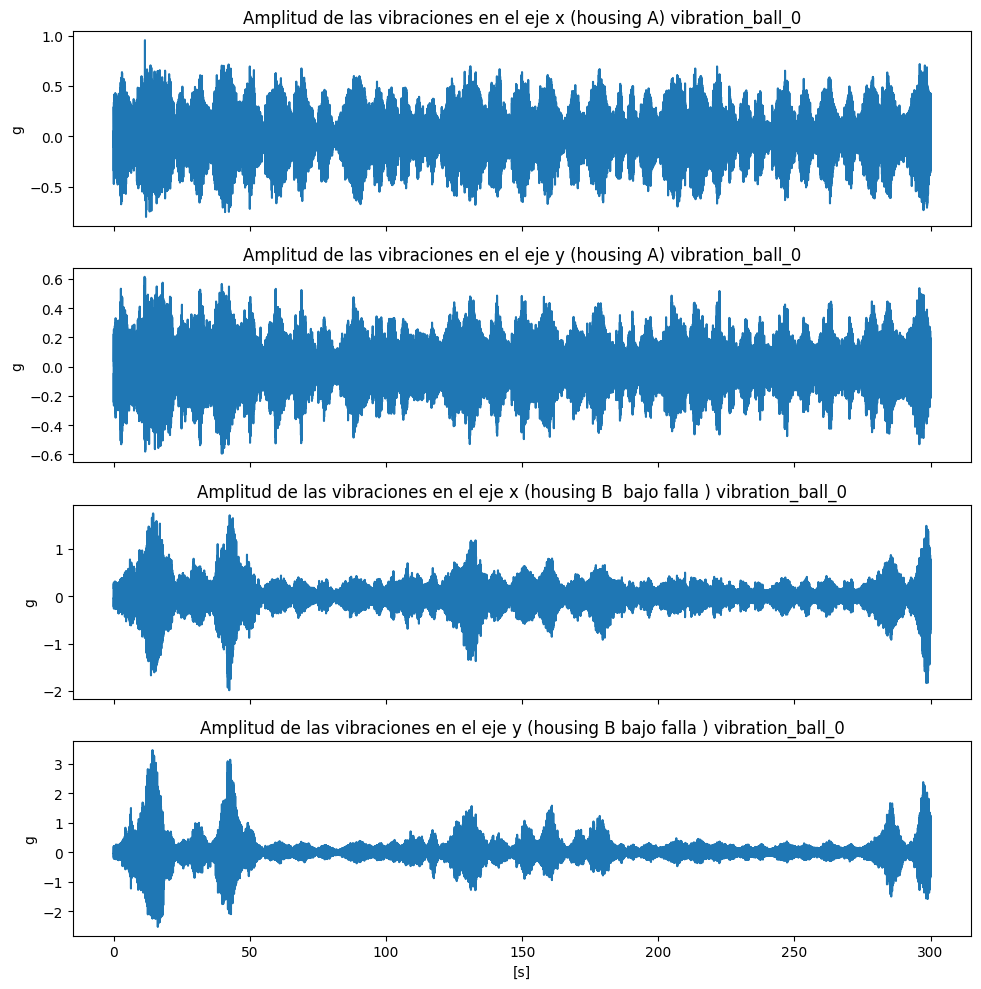

In [15]:
h5py_file =output_file[1]
graficador.plot_data_from_h5py(h5py_file)

In [31]:
fnyq=25.6e3/2
wp=20
ws=400
N, Wn = signal.buttord(wp/fnyq,ws/fnyq , 3, 40, True) #determino el orden y la frecuencia natural del flitro
# b, a = signal.butter(N, Wn, 'band', True) #determino los parametros de la funcion de transferencia del filtro

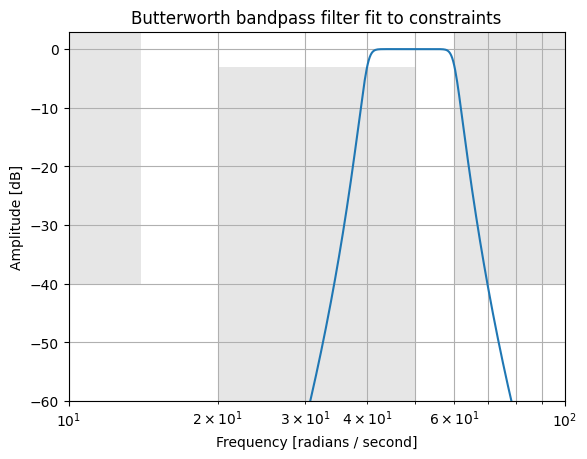

In [34]:
N, Wn = signal.buttord([40, 60], [14, 70], 3, 40, True)
b, a = signal.butter(N, Wn, 'band', True)
w, h = signal.freqs(b, a, np.logspace(1, 2, 500))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth bandpass filter fit to constraints')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.fill([1,  14,  14,   1], [-40, -40, 99, 99], '0.9', lw=0) # stop
plt.fill([20, 20,  50,  50], [-99, -3, -3, -99], '0.9', lw=0) # pass
plt.fill([60, 60, 1e9, 1e9], [99, -40, -40, 99], '0.9', lw=0) # stop
plt.axis([10, 100, -60, 3])
plt.show()

In [30]:
N

13

In [10]:
filtered = signal.sosfilt(sos,selected_data[3])

array([1.59811317e+19, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])